#TC2034 Modelación del Aprendizaje con Inteligencia Artificial
## Aprendizaje Supervisado
### Actividad 4. Modelos de aprendizaje supervisado
### Sebastián Miramontes Soto A01285296
### Raúl Correa Ocañas A01722401
### Ericka Sofia Rodriguez Sanchez A01571463





In [1]:
# importar la biblioteca para análisis de datos
import numpy as np
# importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline
# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

## Lectura y preprocesamiento del conjunto de datos

In [2]:
# leer el conjunto de datos a utilizar
df = pd.read_csv('smoking.csv')

# desplegar las primeras 5 líneas del dataframe
df.head()

# Categóricos: Gender, Oral, Dental Caries, Tartar, Smoke. Ordinales: Age.
# Continuos: height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic : Blood pressure, relaxation : Blood pressure, fasting blood sugar, Cholesterol : total, triglyceride, HDL : holesterol type, LDL : cholesterol type, hemoglobin, Urine protein, serum creatinine, AST : glutamic oxaloacetic transaminase type, ALT : glutamic oxaloacetic transaminase type, Gtp : γ-GTP.
# Alfanumericos: ID.

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0.0,Y,0.0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0.0,Y,0.0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0.0,N,1.0
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0.0,Y,0.0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0.0,N,0.0


In [3]:
# mostrar la información condensada del contenido del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27756 entries, 0 to 27755
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27756 non-null  int64  
 1   gender               27756 non-null  object 
 2   age                  27756 non-null  int64  
 3   height(cm)           27756 non-null  int64  
 4   weight(kg)           27756 non-null  int64  
 5   waist(cm)            27756 non-null  float64
 6   eyesight(left)       27756 non-null  float64
 7   eyesight(right)      27756 non-null  float64
 8   hearing(left)        27756 non-null  float64
 9   hearing(right)       27756 non-null  float64
 10  systolic             27756 non-null  float64
 11  relaxation           27756 non-null  float64
 12  fasting blood sugar  27756 non-null  float64
 13  Cholesterol          27756 non-null  float64
 14  triglyceride         27756 non-null  float64
 15  HDL                  27755 non-null 

In [4]:
# determinar la cantidad de datos distintos en cada columna
df.nunique()

ID                     27756
gender                     2
age                       14
height(cm)                12
weight(kg)                22
waist(cm)                529
eyesight(left)            19
eyesight(right)           17
hearing(left)              2
hearing(right)             2
systolic                 121
relaxation                90
fasting blood sugar      249
Cholesterol              273
triglyceride             385
HDL                      120
LDL                      268
hemoglobin               140
Urine protein              6
serum creatinine          32
AST                      181
ALT                      217
Gtp                      423
oral                       1
dental caries              2
tartar                     2
smoking                    2
dtype: int64

In [5]:
# estadísticas de los atributos numéricos
df.describe()

# Las muestras totales son 55692.
# Smoking es una característica categórica con valores de 0 o 1.
# Alrededor del 36.7% de las muestras fuman.
# La media de los encuestados en edad y peso es de 1.64 M y 66 kg.
# Casi el 22% de los encuestados tenían caries dentales.
# La edad promedio de los encuestados es de 44 años.
# La mayoría de los casos de habilidad de visión y de escucha ronda el nivel 1.

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,27756.000000,...,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000
mean,17339.181474,44.240885,164.614137,65.837837,82.050393,1.009176,1.006665,1.025688,1.026553,121.530300,...,57.357629,114.991605,14.613752,1.087408,0.885595,26.234949,27.091587,40.088344,0.213907,0.363322
std,9989.240265,12.096792,9.194974,12.818862,9.294711,0.460635,0.478712,0.158206,0.160775,13.707419,...,14.656171,41.488391,1.558724,0.407554,0.219478,20.078561,32.015142,50.958256,0.410070,0.480965
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,72.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000
25%,8731.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,17299.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,25995.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,34633.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,...,359.000000,1860.000000,20.900000,6.000000,10.300000,1311.000000,2062.000000,999.000000,1.000000,1.000000


In [6]:
# estadísticas de los atributos string (Object)
df.describe(include=['O'])

# La mayoría de los encuestados (64%) fueron hombres (35401/55692), el resto mujeres
# El 100% de los encuestados se realizó la prueba oral.
# El 55% de los encuestados presentó sarro en los dientes.

,gender,oral,tartar
count,27756,27755,27755
unique,2,1,2
top,M,Y,Y
freq,17582,27755,15399


#Suposiciones basadas en el análisis de datos
Llegamos a las siguientes suposiciones basados en el análisis de datos realizados hasta ahora. Podríamos validar más estos supuestos antes de tomar las acciones apropiadas.

###Correlacionando

1.   Queremos saber qué tan bien se correlaciona cada característica con el "si o no fuma".
2.   Queremos hacer esto al principio de nuestro proyecto y coincidir con estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

###Corrigiendo
Debido a la cantidad de hiperparametros y los tests que se realizan es problable que sea necesaria una reducción en la cantidad de datos que se van a tomar para que los resultados se puedan obtener en un tiempo razonable.

In [11]:
# Por cuestiones de correlaci+on, tiempo, sesgo y necesidad,  eliminaremos las columnas de oral, hearing y
df2 = df.drop(columns=['oral','hearing(left)','hearing(right)','ID','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','HDL','LDL'])

# mostrar la información condensada del nuevo dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27756 entries, 0 to 27755
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27756 non-null  object 
 1   age                  27756 non-null  int64  
 2   systolic             27756 non-null  float64
 3   relaxation           27756 non-null  float64
 4   fasting blood sugar  27756 non-null  float64
 5   Cholesterol          27756 non-null  float64
 6   triglyceride         27756 non-null  float64
 7   hemoglobin           27755 non-null  float64
 8   Urine protein        27755 non-null  float64
 9   serum creatinine     27755 non-null  float64
 10  AST                  27755 non-null  float64
 11  ALT                  27755 non-null  float64
 12  Gtp                  27755 non-null  float64
 13  dental caries        27755 non-null  float64
 14  tartar               27755 non-null  object 
 15  smoking              27755 non-null 

Mediana= 40.0


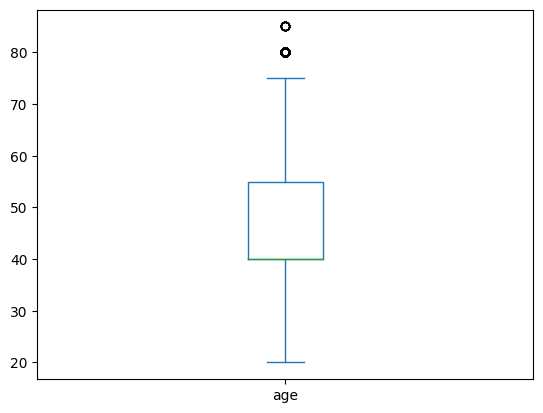

In [12]:
# Muestra de la distribución de las edades en el caso.
df2['age'].plot(kind='box')
print("Mediana=", df2['age'].median())

In [14]:
# Convierte datos string en numéricos introduciendo variables dummy
# para los atributos de sexo y puerto de embarque
df4 = pd.get_dummies(df2,columns=['tartar','gender'], drop_first=True)

# muestra las primeras 5 líneas del dataframe resultante
df4.head()

,age,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,tartar_Y,gender_M
0,40,114.0,73.0,94.0,215.0,82.0,12.9,1.0,0.7,18.0,19.0,27.0,0.0,0.0,1,0
1,40,119.0,70.0,130.0,192.0,115.0,12.7,1.0,0.6,22.0,19.0,18.0,0.0,0.0,1,0
2,55,138.0,86.0,89.0,242.0,182.0,15.8,1.0,1.0,21.0,16.0,22.0,0.0,1.0,0,1
3,40,100.0,60.0,96.0,322.0,254.0,14.7,1.0,1.0,19.0,26.0,18.0,0.0,0.0,1,1
4,40,120.0,74.0,80.0,184.0,74.0,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0.0,0,0


In [28]:
df3 = df4.sample(n=5000, random_state=42)
df3.head()

,age,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,tartar_Y,gender_M
27074,40,127.0,76.0,93.0,190.0,104.0,11.0,1.0,0.7,15.0,7.0,13.0,0.0,0.0,1,0
12947,70,122.0,70.0,90.0,171.0,129.0,13.8,1.0,0.9,30.0,28.0,31.0,0.0,0.0,0,0
8170,45,123.0,71.0,97.0,240.0,140.0,14.4,1.0,1.0,21.0,17.0,27.0,0.0,1.0,1,1
8300,50,160.0,110.0,133.0,219.0,326.0,15.0,1.0,1.0,43.0,59.0,149.0,1.0,1.0,0,1
11242,75,140.0,77.0,91.0,216.0,173.0,14.8,1.0,0.9,21.0,14.0,21.0,0.0,0.0,1,1


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 27074 to 14206
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5000 non-null   int64  
 1   systolic             5000 non-null   float64
 2   relaxation           5000 non-null   float64
 3   fasting blood sugar  5000 non-null   float64
 4   Cholesterol          5000 non-null   float64
 5   triglyceride         5000 non-null   float64
 6   hemoglobin           5000 non-null   float64
 7   Urine protein        5000 non-null   float64
 8   serum creatinine     5000 non-null   float64
 9   AST                  5000 non-null   float64
 10  ALT                  5000 non-null   float64
 11  Gtp                  5000 non-null   float64
 12  dental caries        5000 non-null   float64
 13  smoking              5000 non-null   float64
 14  tartar_Y             5000 non-null   uint8  
 15  gender_M             5000 non-nul

In [30]:
# Normaliza los datos utilizando el escalador de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(df3)
dataScaled = scaler.transform(df3)

# muestra el arreglo resultante
dataScaled

array([[ 0.        ,  0.38888889,  0.        , ...,  0.        ,
         0.        , -1.        ],
       [ 2.        ,  0.11111111, -0.5       , ...,  0.        ,
        -1.        , -1.        ],
       [ 0.33333333,  0.16666667, -0.41666667, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.33333333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.66666667,  0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.66666667, -0.55555556, -0.5       , ...,  0.        ,
         0.        , -1.        ]])

In [32]:
# crea un dataframe con los datos normalizados
data = pd.DataFrame(dataScaled)
data.columns = df3.columns

# muestra las primeras 5 líneas del dataframe resultante
data.head()

,age,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,tartar_Y,gender_M
0,0.000000,0.388889,0.000000,-0.200000,-0.086957,-0.048780,-1.727273,0.0,-1.0,-0.8,-0.8750,-0.500000,0.0,0.0,0.0,-1.0
1,2.000000,0.111111,-0.500000,-0.400000,-0.500000,0.256098,-0.454545,0.0,0.0,0.7,0.4375,0.192308,0.0,0.0,-1.0,-1.0
2,0.333333,0.166667,-0.416667,0.066667,1.000000,0.390244,-0.181818,0.0,0.5,-0.2,-0.2500,0.038462,0.0,1.0,0.0,0.0
3,0.666667,2.222222,2.833333,2.466667,0.543478,2.658537,0.090909,0.0,0.5,2.0,2.3750,4.730769,1.0,1.0,-1.0,0.0
4,2.333333,1.111111,0.083333,-0.333333,0.478261,0.792683,0.000000,0.0,0.0,-0.2,-0.4375,-0.192308,0.0,0.0,0.0,0.0


In [35]:
# muestra la información condensada del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5000 non-null   float64
 1   systolic             5000 non-null   float64
 2   relaxation           5000 non-null   float64
 3   fasting blood sugar  5000 non-null   float64
 4   Cholesterol          5000 non-null   float64
 5   triglyceride         5000 non-null   float64
 6   hemoglobin           5000 non-null   float64
 7   Urine protein        5000 non-null   float64
 8   serum creatinine     5000 non-null   float64
 9   AST                  5000 non-null   float64
 10  ALT                  5000 non-null   float64
 11  Gtp                  5000 non-null   float64
 12  dental caries        5000 non-null   float64
 13  smoking              5000 non-null   float64
 14  tartar_Y             5000 non-null   float64
 15  gender_M             5000 non-null   f

## Creación de conjuntos de entrenamiento y prueba

In [36]:
# crea los conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["smoking"], axis=1), train_df["smoking"]
X_test, y_test = test_df.drop(columns=["smoking"], axis=1), test_df["smoking"]

# muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (4000, 15) (4000,)
Datos de prueba= (1000, 15) (1000,)


##Creación de Modelos de Aprendizaje

### Regresión Logística

In [37]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrc, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.693111111111111
score promedio de validación =  0.692


,fit_time,score_time,test_score,train_score
0,0.050785,0.006024,0.6925,0.690278
1,0.067888,0.010314,0.7125,0.688333
2,0.078840,0.003193,0.6725,0.697222
3,0.050679,0.003379,0.6950,0.693611
4,0.081361,0.003727,0.6950,0.693611
5,0.041375,0.003332,0.6725,0.694722
6,0.077203,0.007601,0.6825,0.694722
7,0.075544,0.003620,0.6825,0.695556
8,0.058214,0.009671,0.7000,0.691944
9,0.069119,0.007740,0.7150,0.691111


In [38]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

Mejores hiperparámetros
 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.08685113737513521}


In [39]:
# quédate con la Regresión Logística con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.728

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       645
         1.0       0.62      0.61      0.61       355

    accuracy                           0.73      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.73      0.73      0.73      1000



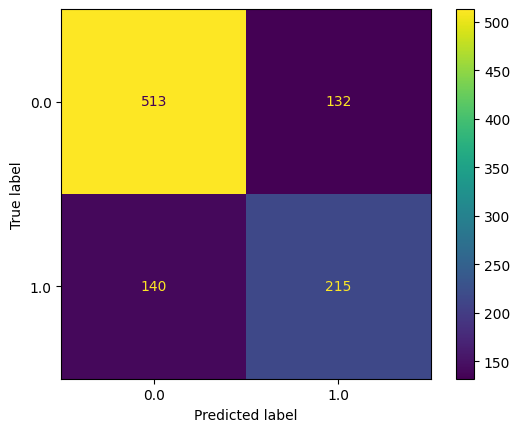

In [40]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para la mejor Regresión Logística
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

### Bosque Aleatorio

In [41]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de bosques aleatorios de 10 árboles con una profundidad máxima de 3
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.738388888888889
score promedio de validación =  0.72275


,fit_time,score_time,test_score,train_score
0,0.034029,0.003380,0.7550,0.731389
1,0.032740,0.003309,0.7150,0.738611
2,0.031145,0.003334,0.7025,0.746667
3,0.028903,0.003192,0.7200,0.730278
4,0.030345,0.003291,0.7050,0.744167
5,0.029491,0.003188,0.7350,0.731111
6,0.028517,0.003109,0.7350,0.752778
7,0.038358,0.007044,0.7050,0.730833
8,0.031866,0.005333,0.7400,0.749444
9,0.036569,0.003290,0.7150,0.728611


In [42]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': None, 'n_estimators': 100}


In [43]:
# quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.721

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       645
         1.0       0.60      0.66      0.63       355

    accuracy                           0.72      1000
   macro avg       0.70      0.71      0.70      1000
weighted avg       0.73      0.72      0.72      1000



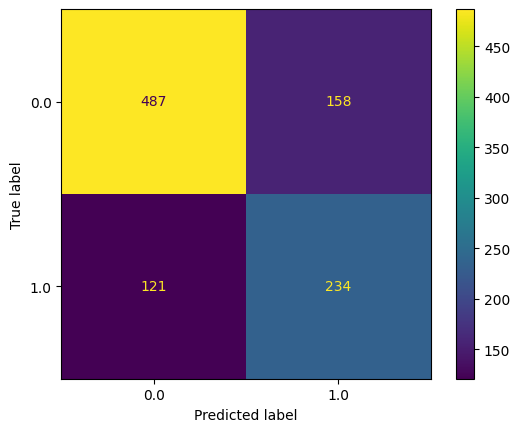

In [44]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para el mejor Bosque Aleatorio
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

###Máquina de Vectores de Soporte

In [45]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Máquina de Vectores de Soporte con un parámetro de regularización de
# 0.01 y un kernel polinomial
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.6581388888888888
score promedio de validación =  0.6517499999999999


,fit_time,score_time,test_score,train_score
0,0.511549,0.038875,0.6475,0.657222
1,0.701733,0.038171,0.6500,0.655833
2,0.611252,0.040368,0.6525,0.658056
3,0.611898,0.039783,0.6400,0.659444
4,0.642185,0.038802,0.6575,0.657222
5,0.655379,0.067428,0.6550,0.656944
6,0.865095,0.064503,0.6500,0.658056
7,0.699564,0.037457,0.6475,0.667500
8,0.598629,0.039165,0.6575,0.655000
9,0.594249,0.038551,0.6600,0.656111


In [46]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir una Máquina de Vectores de Soporte para el problema
parameters = {'C': [0.1, 1],
              'kernel': ['poly', 'rbf'],
              'gamma': ['scale', 'auto', 0.1, 1.0]}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
# quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros
# encontrados y despliega su score con los datos del conjunto de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.737

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       645
         1.0       0.62      0.66      0.64       355

    accuracy                           0.74      1000
   macro avg       0.71      0.72      0.72      1000
weighted avg       0.74      0.74      0.74      1000



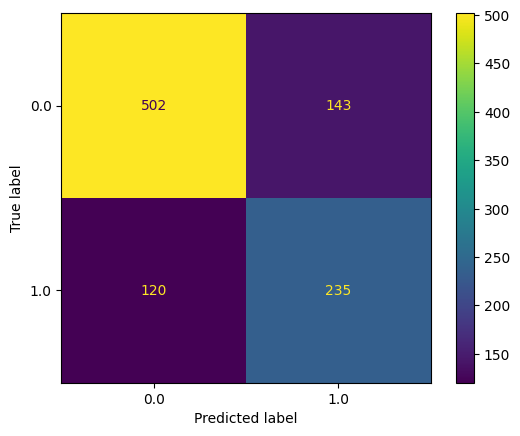

In [48]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para el mejor Bosque Aleatorio
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test)))

## Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 640x480 with 0 Axes>

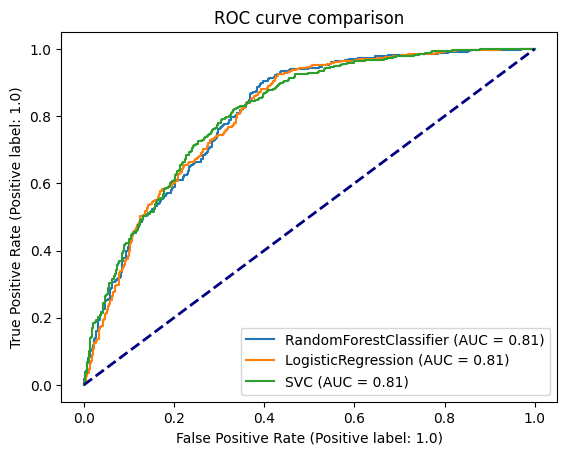

In [49]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

Para determinar cuál de los tres modelos fue el mejor, se evaluaron diferentes métricas, incluyendo precisión, recuperación (recall), puntuación F1 y exactitud (accuracy), así como la curva ROC. Aunque la curva ROC fue igual para todos los modelos, al analizar las métricas de precisión, recall y F1-score, se encontró que el modelo de Support Vector Classifier (SVC) superó a los otros dos.

El modelo SVC demostró tener las métricas más altas tanto para la clase 0 como para la clase 1, así como una puntuación F1 más alta, que es una medida combinada de precisión y recall. Esto sugiere que el SVC logró un mejor equilibrio entre precisión y recall en comparación con los otros modelos.

Por lo tanto, basándose en estas métricas, se concluye que el modelo SVC es el más adecuado para este conjunto de datos en particular.

## **Conclusión**:

En esta actividad implementamos varios modelos de Aprendizaje Supervisado (Regresión Logística, Bosque Aleatorio y Máquina de Vectores de Soporte) para predecir si una persona fuma o no. Primeramente, se comenzó con la búsqueda de una base de datos que contuviera la información necesaria para poder realizar el análisis, en nuestro caso nosotros utilizamos una base de datos acerca de posibles fumadores para poder predecir o encontrar la relación entre las variables con el fin de decir si la persona fuma o no. Sabiendo que tener una mala distribución de los datos puede sesgar los resultados, se prioriza buscar una en la que no sea necesario hacer un remuestreo de datos. Una vez encontrada la base de datos, se procedió a realizar un análisis exploratorio de los datos para entender la distribución de los datos y la relación entre las variables. Posteriormente, se procedió a realizar un preprocesamiento de los datos para poder utilizarlos en los modelos de aprendizaje. Uno de estos procesos consistió en aplicar métodos de escalado para que las variables estuvieran en la misma escala. Adicionalmente, se eliminaron las variables que no aportan información de valor a la variable objetivo. Variables como ID, hearing(left), hearing(right), ALT, entre otras, representan una extrema mayoría de los datos y no permite una predicción adecuada para el modelo, aparte de que muchas no estaban completamente relacionados con la variable predictora, en una relación de causa-efecto o de otro estilo, por lo que las pudimos considerar despreciables o por lo menos menos relevantes que las que decidimos escoger para el caso. Una vez que se tuvieron los datos preprocesados, se procedió a la creación de los conjuntos de entrenamiento y prueba. Con este paso hecho, los datos han sido tratados y procesados de tal forma que están listos para ser implementados en los modelos de aprendizaje no supervisado.

Para entrenar los modelos mencionados previamente, se utilizó la librería de Scikit-learn. Cada uno de los modelos fue optimizado a través de la búsqueda de hiperparámetros. Se utilizaron los métodos de validación de N-Fold Cross Validation y Grid Search para encontrar los mejores, en el que este último se especificó un rango de valores para cada hiperparámetro. Se realizaron más intentos con diferentes hiperparametros, entre ellos el coef0, y con más variables y registros. Sin embargo, esto ocasionó problemas de rendimiento, llegando a las 5 horas de tiempo de ejecución sin llegar a los resultados. Por lo tanto, se decidió optar por escoger los mismos tres hiperparametros vistos en clase y agregar el gamma para el caso de vectores de soporte. De esta forma el código si llegó a una solución en un tiempo razonable, de aproximadamente de una hora y media.

En caso de haber tenido un poco más de tiempo para realizar el código, pudimos haber recurrido a diferentes estrategias para que el código de Python pudiera funcionar de una mejor manera, principalmente el que no cargara en la parte de Máquina de Vectores de Soporte fue uno de los más grandes impedimentos para que no pudiéramos realizar el código como lo deseamos. También pudimos haber alcanzado a encontrar otra base de datos que fuera igual de completa que la utilizada, pero que tuviera una cantidad de variables y datos mucho más baja, para que al momento de hacer el proceso de los hiperparametros fuera un poco más dinámico y no nos frenará.